# CREDIT SCORE CLASSIFICATION

## OBJECTIVE:

The objective of this project is to develop a predictive model to categorize credit applicants into different risk levels. By analysing various features and historical data of applicants, the model aims to assist financial institutions to analyse the credict applications effectively.The credit score of a person determines the creditworthiness of the person. Our goal is to categorise credit scores of customers into three main groups: standard, good and poor and then analyse the risk level.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Load the dataset

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Internship-ICT\credit.csv')

## Exploratory data analysis

In [3]:
#view the first few entries
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


Features of the dataset

ID: Unique identification of an entry
    
Customer_ID: Unique identification of customers

Month: Month of the year

Name: Name of the customer
    
Age: Age of the customer
    
SSN: social security number of the customer
    
Occupation: occupation of the customer
    
Annual Income: Annual income of the Customer
    
Monthly Inhand Salary: Monthly base salary of the Customer
    
Num Bank Accounts: Number of bank accounts a person holds
    
Num Credit Card: Number of other credit cards held by a customer
    
Interest_Rate: Interest rate on credit card
    
Num of Loan: Number of loans taken from the bank

Type of Loan: Types of loan taken by a person
    
Delay from due date: Average number of days delayed from the payment date
    
Num of Delayed Payment: Average number of payments delayed by a person
    
Changed Credit Limit: Percentage change in credit card limit
    
Num Credit Inquiries: Number of credit card inquiries
    
Credit Mix: Classification of the mix of credits
    
Outstanding Debt: Remaining debt to be paid (in USD)
    
Credit Utilization Ratio: Utilization ratio of credit card
    
Credit History Age: Age of credit history of the person
    
Payment of Min Amount: Represents whether only the minimum amount was paid by the person
    
Total EMI per month: Monthly EMI payments (in USD)
    
Amount invested monthly: Monthly amount invested by the customer (in USD)
    
Payment Behaviour: Payment behavior of the customer (in USD)
    
Monthly_Balance: Monthly balance amount of the customer (in USD)
    
Credit Score: Represents the bracket of credit score (Poor, Standard, Good)

In [5]:
#Print the number of rows and columns of the dataset
df.shape

(100000, 28)

In [6]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
#statistical analysis
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [8]:
## Checking the datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [9]:
dtypes = pd.DataFrame(df.dtypes, columns = ['dtypes'])
dtypes

,dtypes
ID,int64
Customer_ID,int64
Month,int64
Name,object
Age,float64
SSN,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64


In [10]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [11]:
## count number of missing values
print(df.isnull().sum())

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


There is no missing values in our data

In [12]:
## Removing unnecessory columns in our data

data = df.copy()
data.drop(["ID","Name","SSN"], axis=1, inplace=True)

In [13]:
data.describe()

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25982.666640,4.500000,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,14340.543051,2.291299,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,1006.000000,1.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,13664.500000,2.750000,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,25777.000000,4.500000,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,38385.000000,6.250000,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,50999.000000,8.000000,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


From this we can observe that there are some outliers in the dataset.

In [14]:
data["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

## Handling outliers

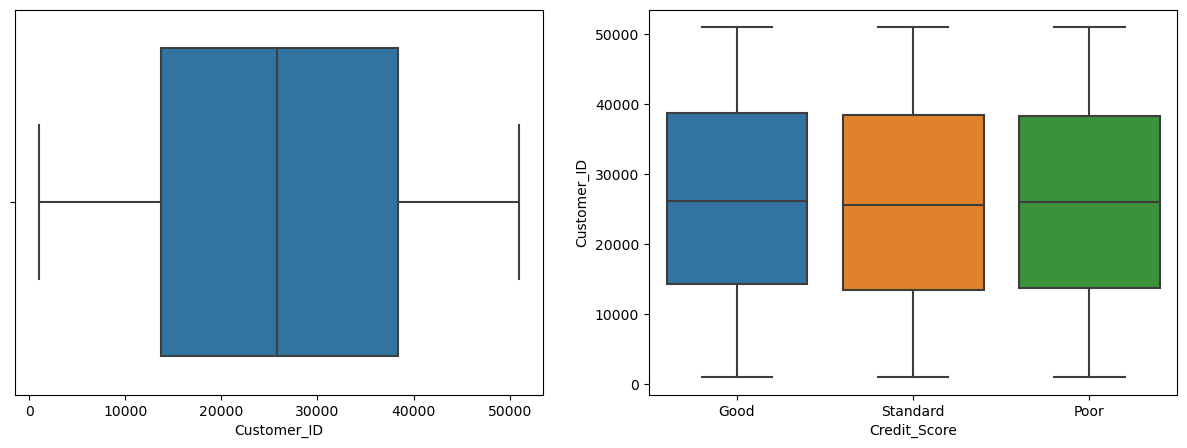

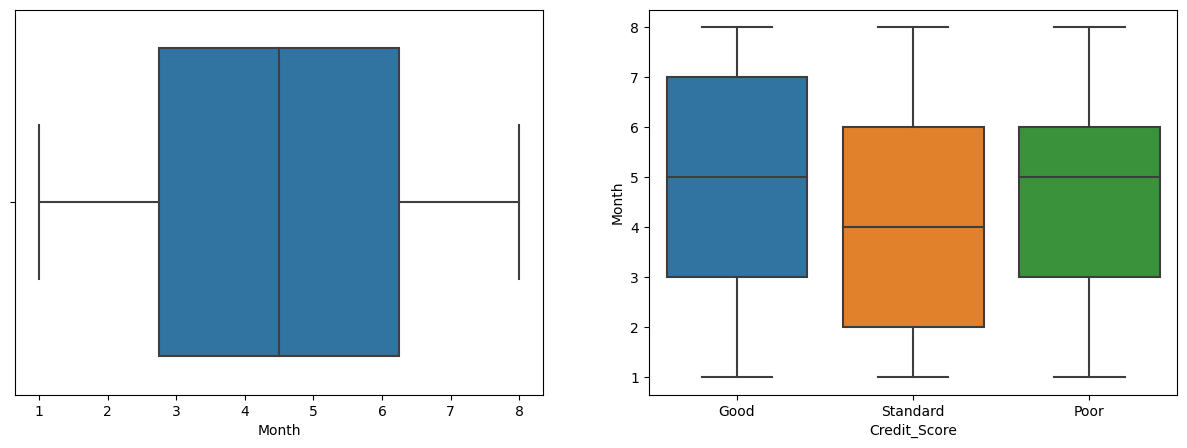

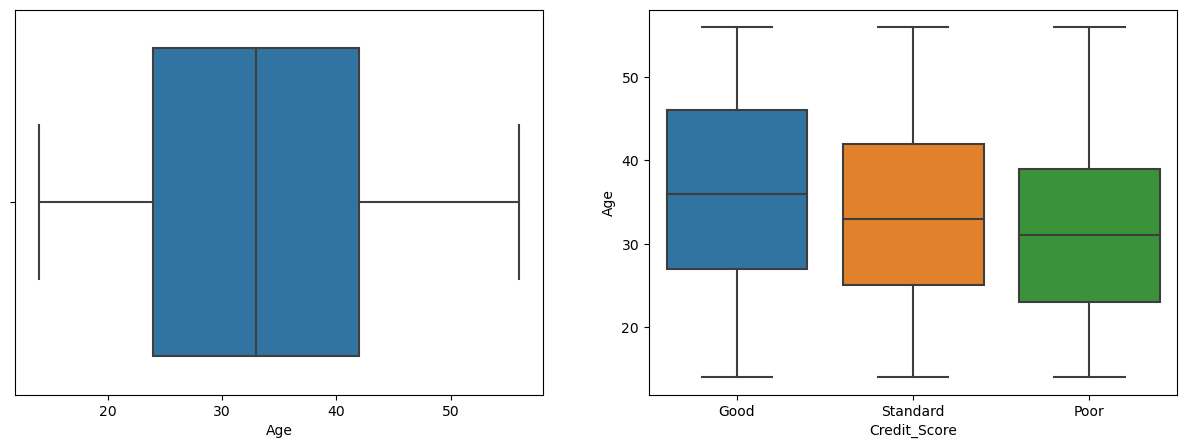

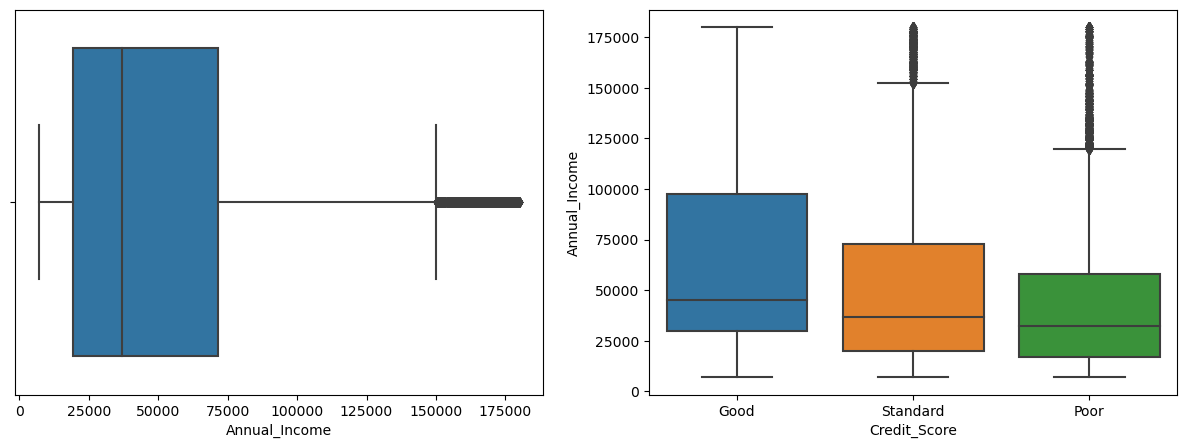

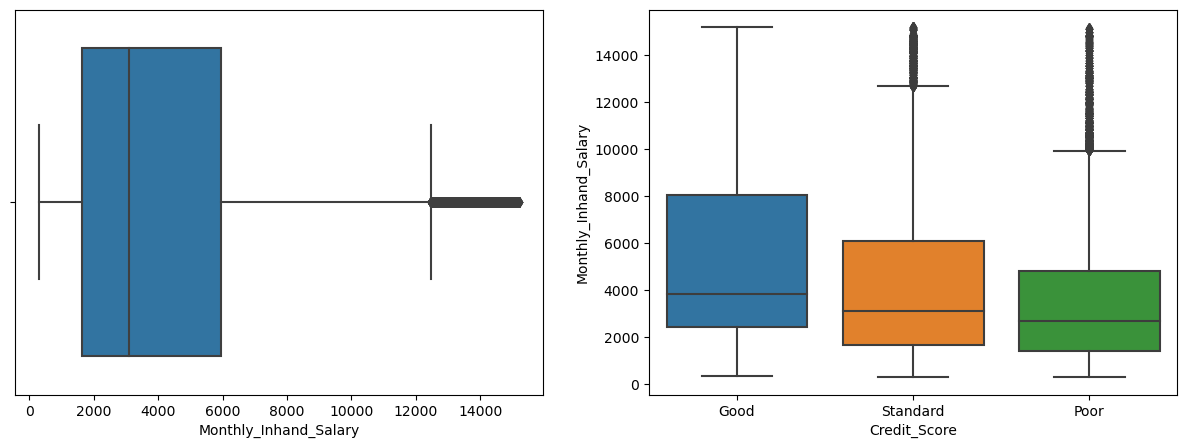

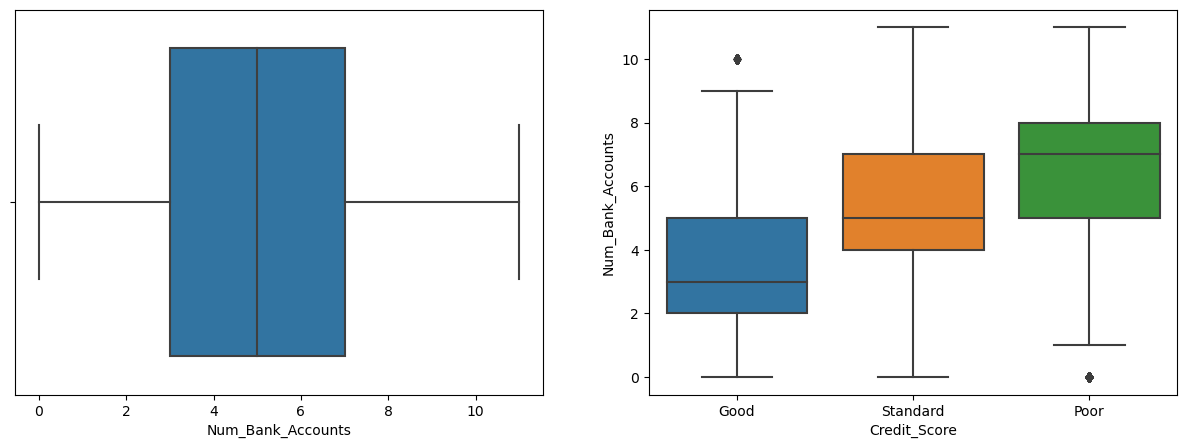

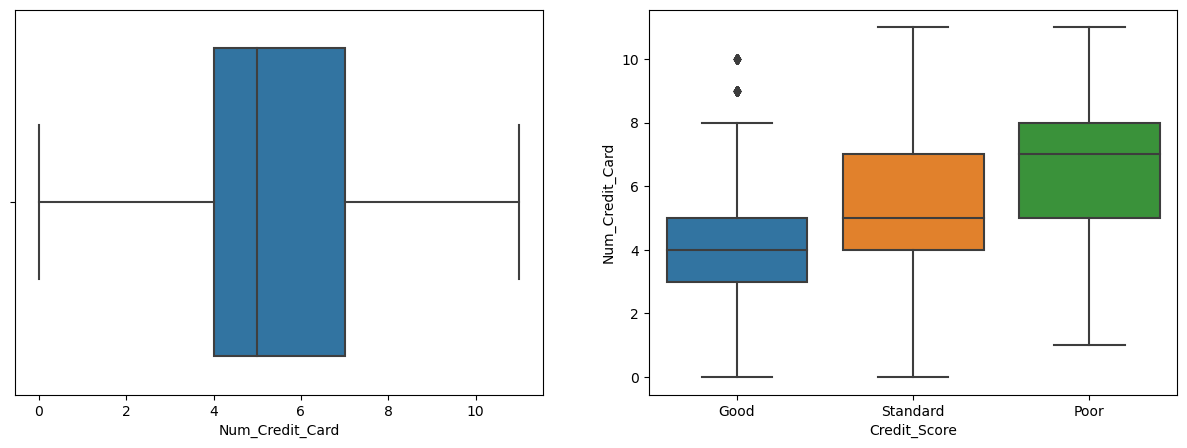

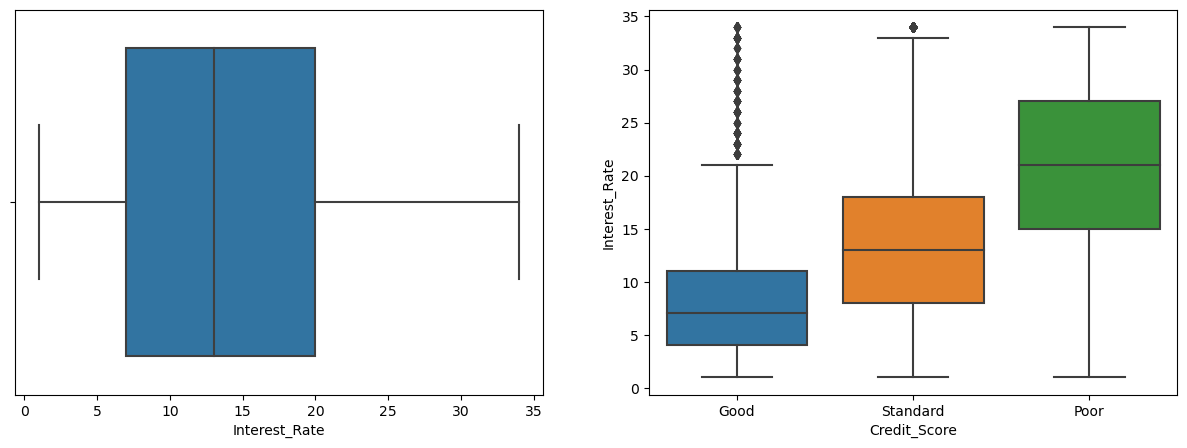

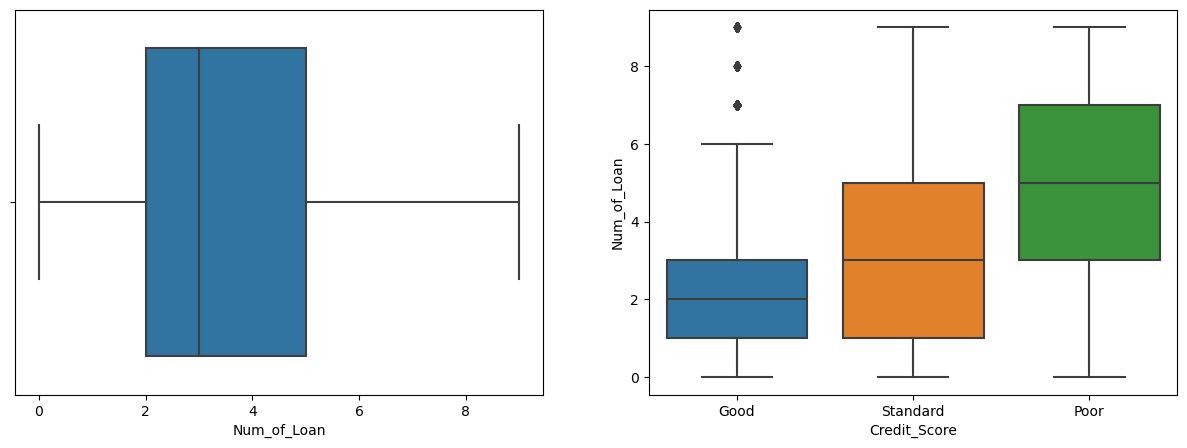

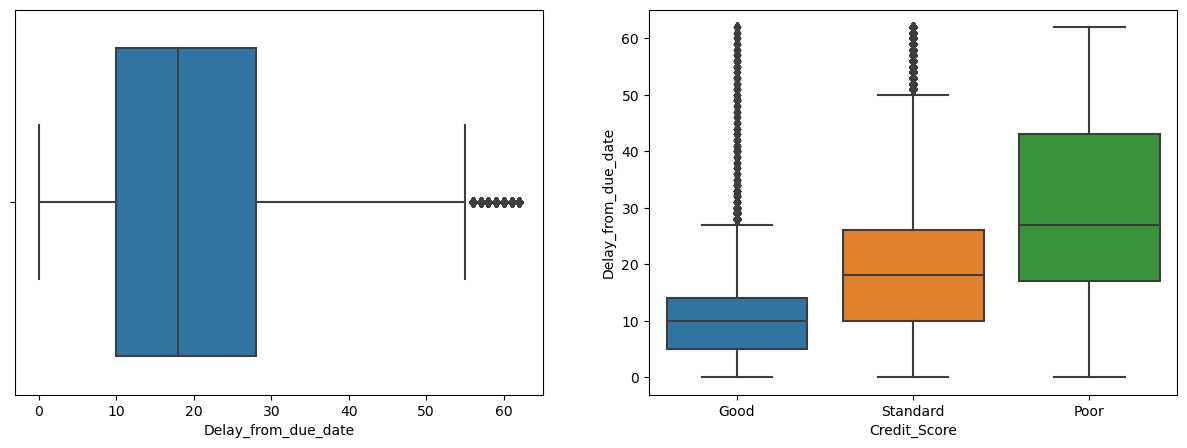

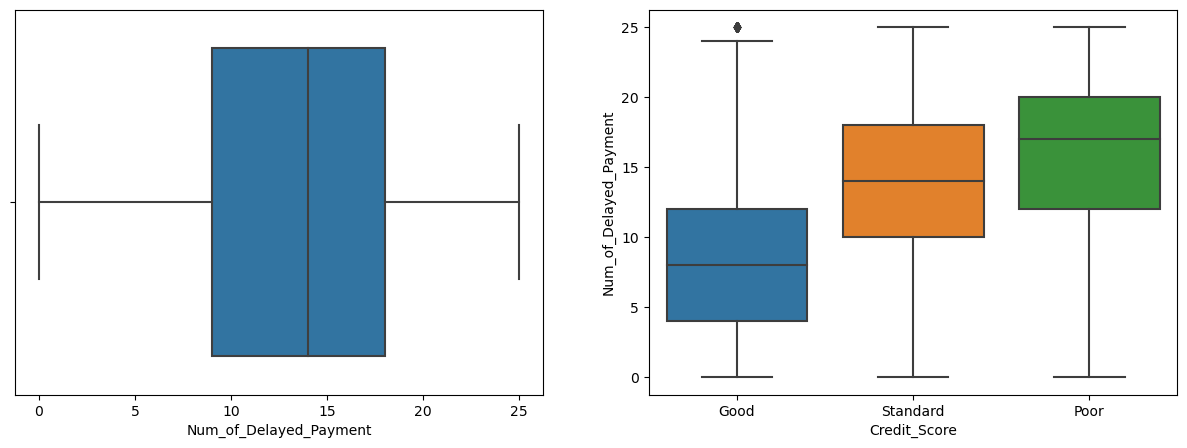

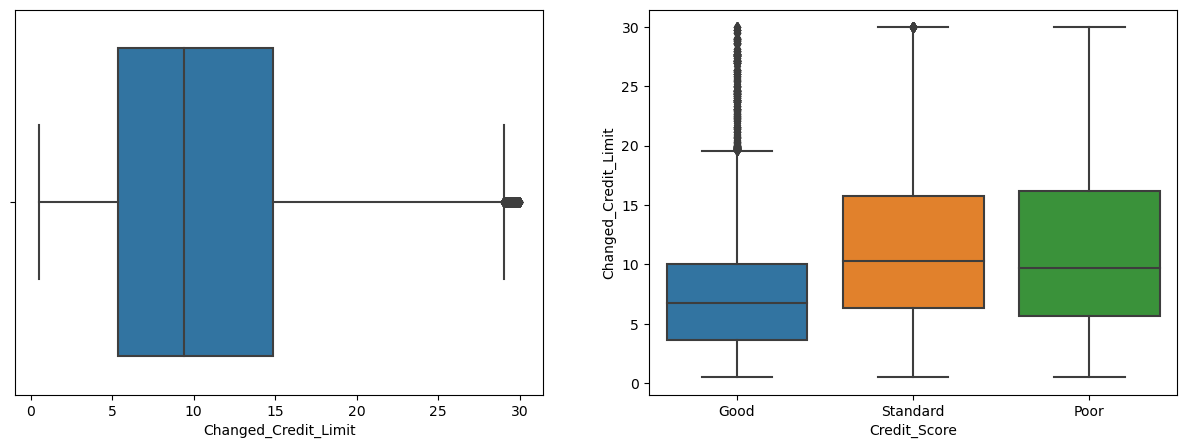

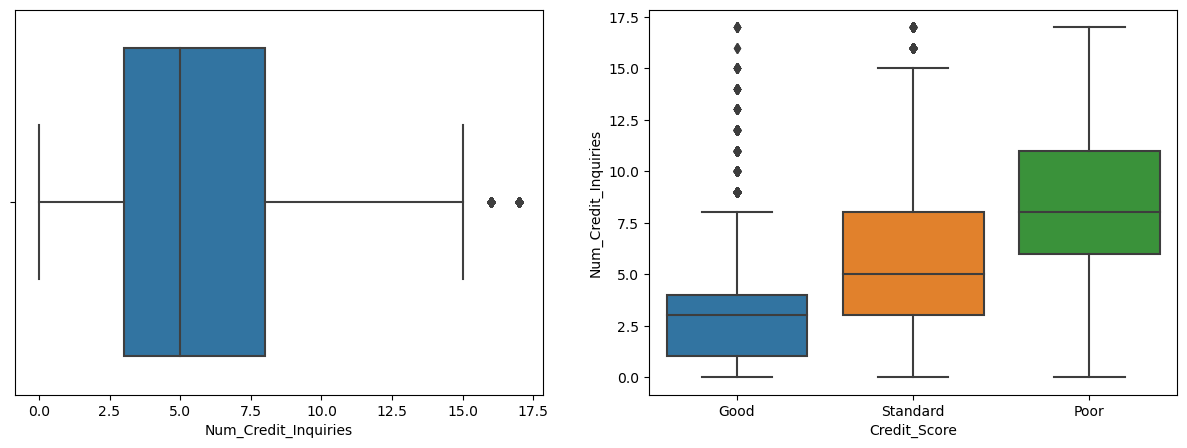

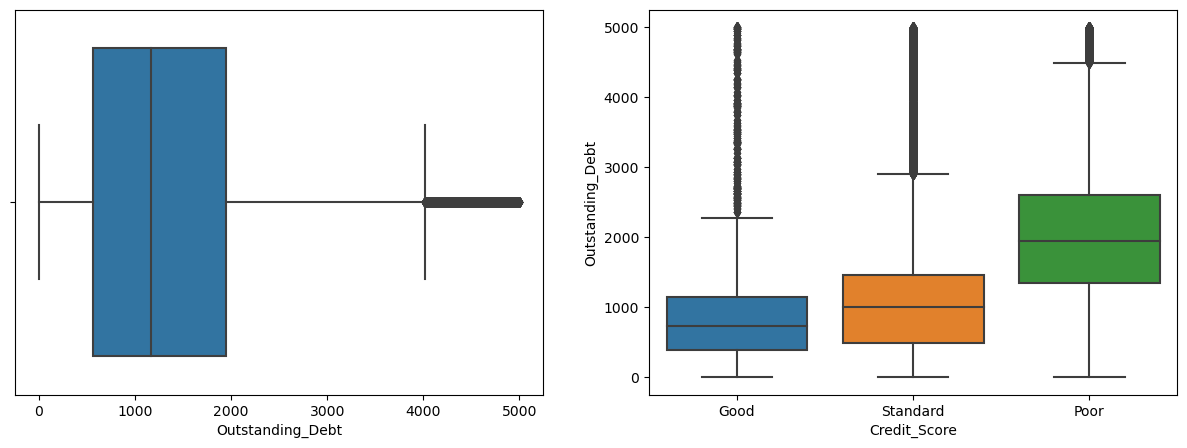

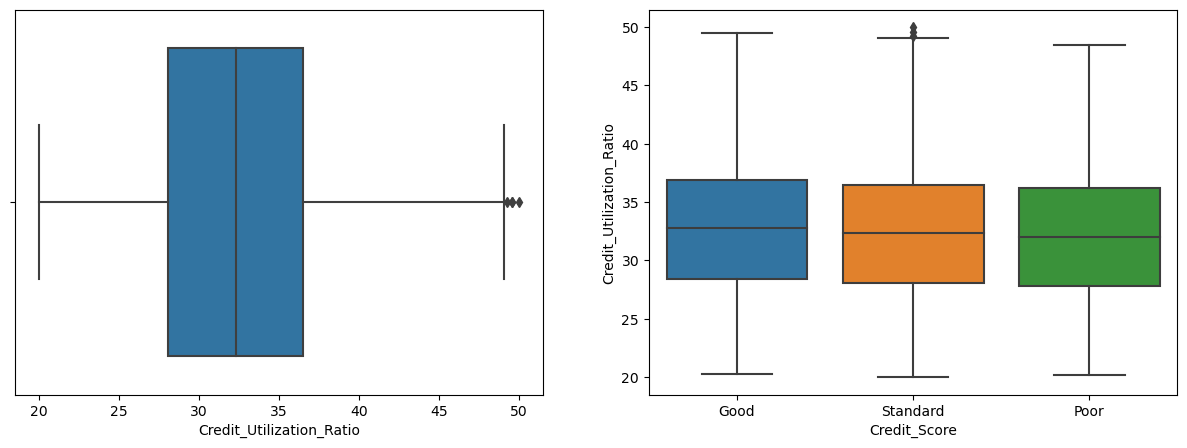

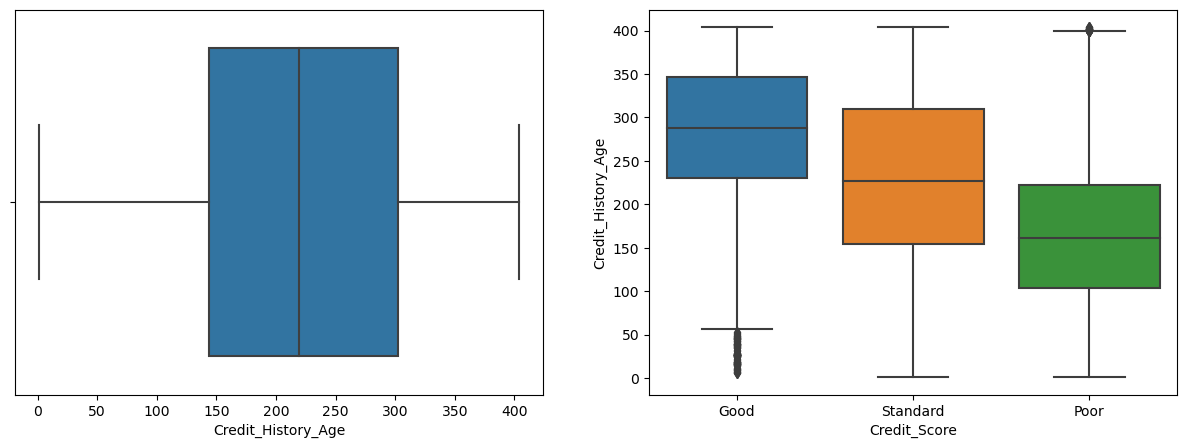

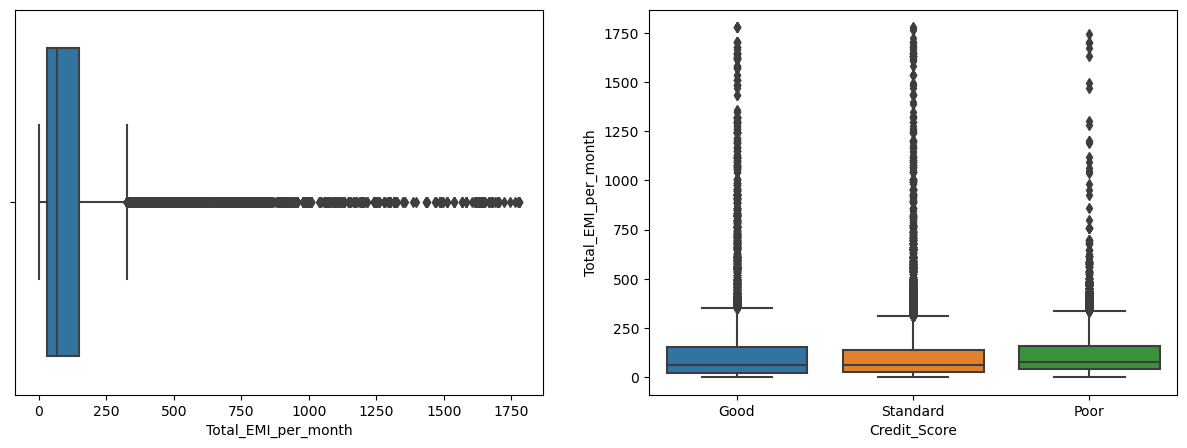

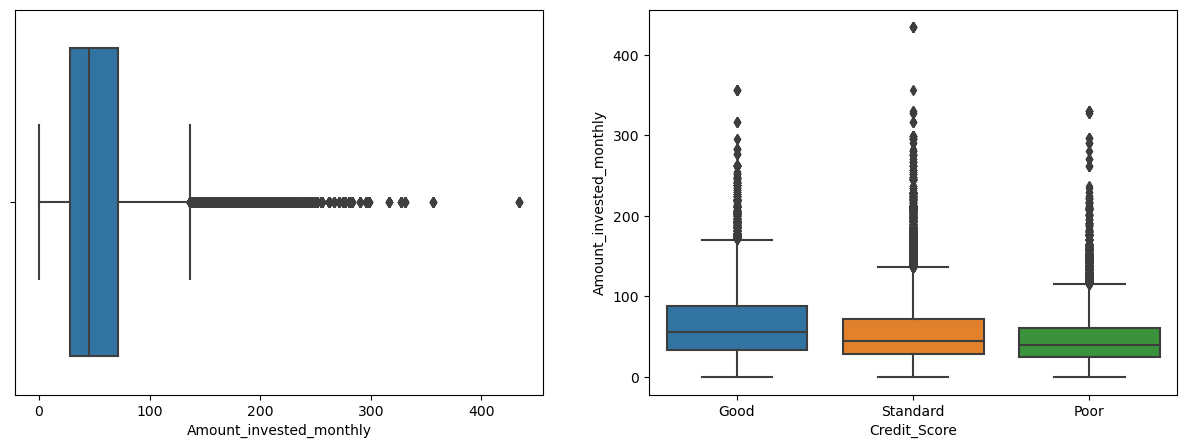

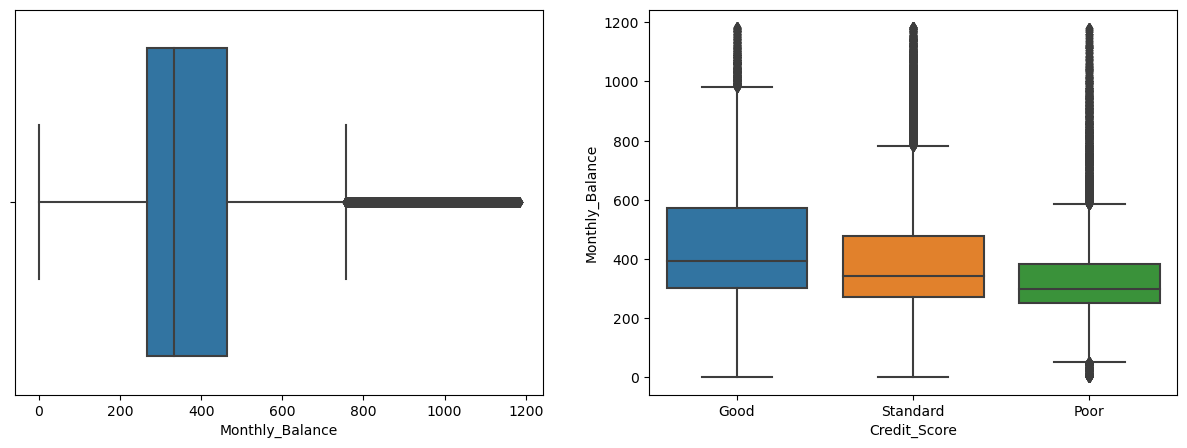

In [15]:
for col in data.select_dtypes(include = np.number):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=col, data =data)
    plt.subplot(1,2,2)
    sns.boxplot(x='Credit_Score',y=col, data =data)
    plt.show()

In [16]:
num_cols=data.select_dtypes(include=["int64","float64"]).columns[1:-8].tolist()
num_cols

['Month',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment']

In [17]:
# By using IQR method

def ouitlier_thresholds(data, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1=data[col_name].quantile(low_quantile)
    Q3=data[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    return low_limit, up_limit

#  fill the outliers with the median value of the relevant variable

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = ouitlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].median()
    dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].median()

## Data Visualisation

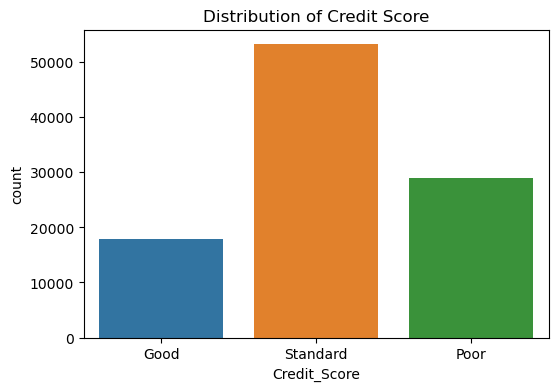

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Credit_Score')
plt.title('Distribution of Credit Score')
plt.show()

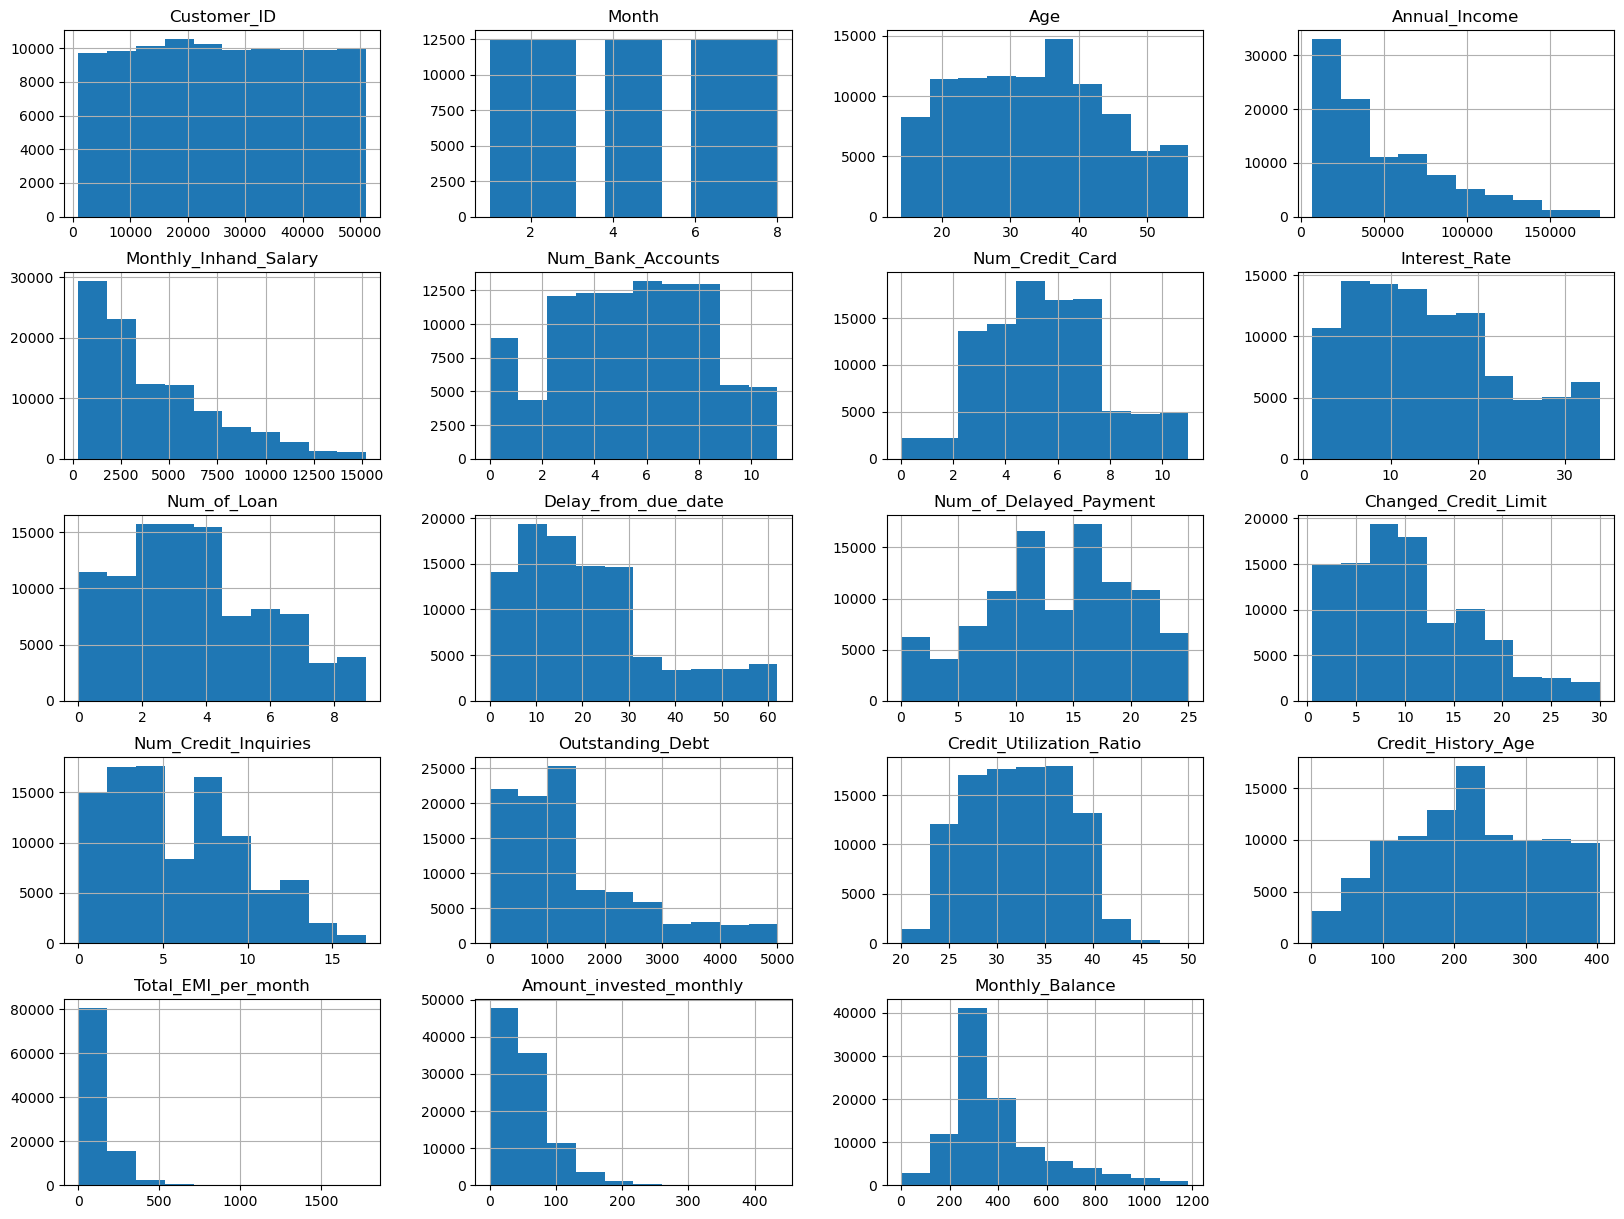

In [19]:
data.hist(figsize=(20, 15))
plt.show()

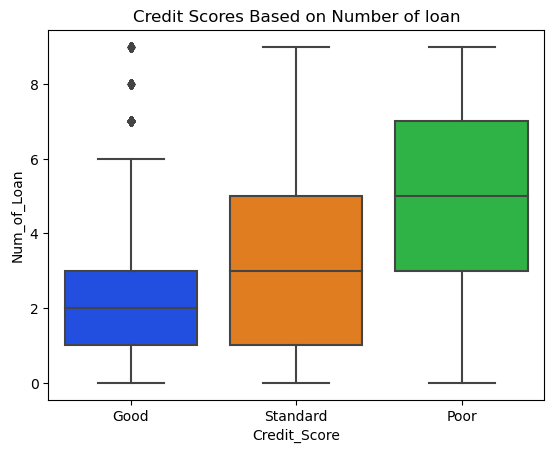

In [32]:
sns.boxplot(y="Num_of_Loan", x="Credit_Score",data=data,palette='bright') 
plt.title("Credit Scores Based on Number of loan")
plt.show()

##### credit score decreases when number of loan increases

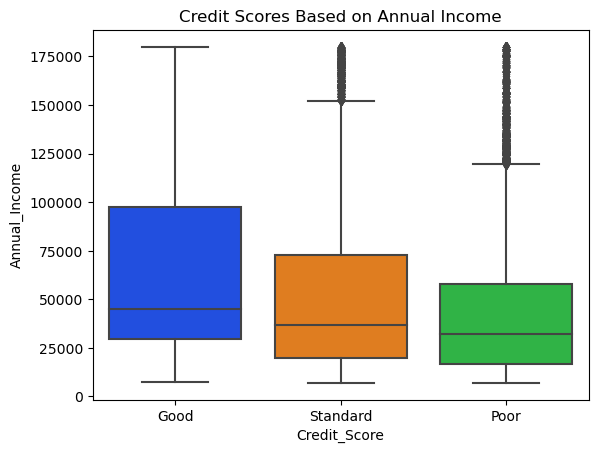

In [34]:
sns.boxplot(data=data, x="Credit_Score",y="Annual_Income",palette='bright')
plt.title("Credit Scores Based on Annual Income")
plt.show()

##### The credit score is good for persons with high annual income.

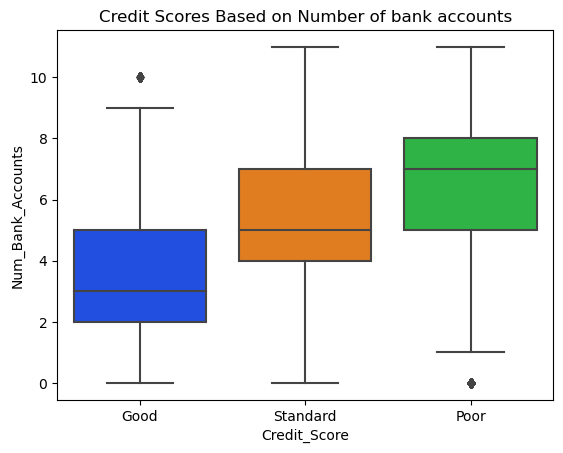

In [27]:
sns.boxplot(data=data, x="Credit_Score",y="Num_Bank_Accounts",palette='bright')
plt.title("Credit Scores Based on Number of bank accounts")
plt.show()

##### when number of bank account increases, credit score tends to be poor

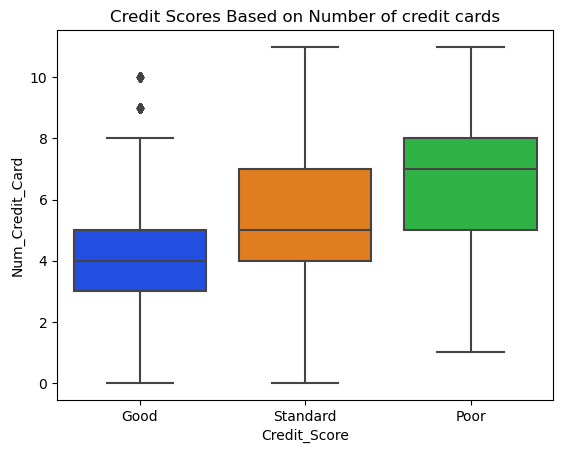

In [28]:
sns.boxplot(data=data, x="Credit_Score",y="Num_Credit_Card",palette='bright')
plt.title("Credit Scores Based on Number of credit cards")
plt.show()

##### Like number of bank accounts, when number of credit cards increases, credit scores tend to be poor

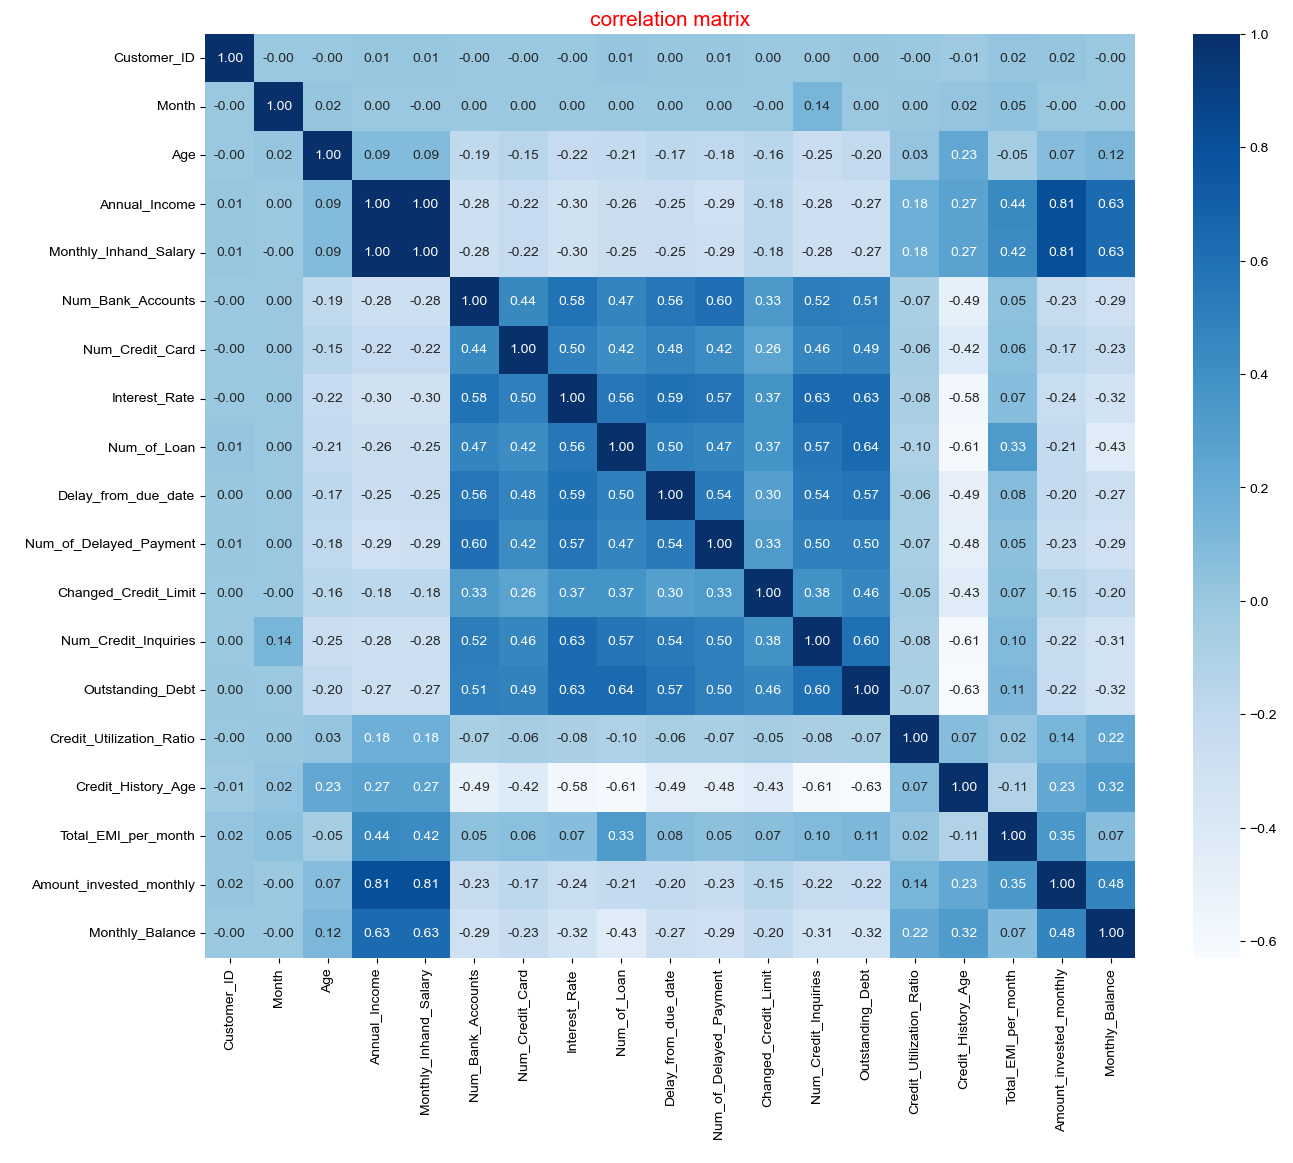

In [35]:
# correlation analysis
data_corr=data.select_dtypes(include=["float64","int64"]).corr()

plt.figure(figsize=(15,12))
plt.title("correlation matrix", color="red",fontsize=15)
sns.heatmap(data_corr,annot=True,cmap="Blues",fmt=".2f")
sns.set(font_scale=1,style='white')
plt.show()

In [36]:
data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [37]:
#Transforming the column in 0, 1, or 2.
data['Credit_Mix'] = data['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

In [38]:
# After transformation
data['Credit_Mix'].unique()

array([2, 1, 0], dtype=int64)

In [39]:
data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [40]:
#Transforming the column in 0, 1, or 2.
data['Credit_Score'] = data['Credit_Score'].map({'Good': 2, 'Standard': 1, 'Poor': 0})

In [41]:
# After transformation
data['Credit_Score'].unique()

array([2, 1, 0], dtype=int64)

## Train test split

In [42]:
X = data[["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", 
        "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", "Credit_History_Age", 
        "Monthly_Balance"]].values
y = data['Credit_Score'].values

In [43]:
print(X.shape, y.shape)

(100000, 12) (100000,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.2, 
                                                random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 12) (20000, 12) (80000,) (20000,)


## Feature Scaling

In [45]:
# Scale the input features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building and Evaluation

Using five models for classification of fraudulent and non-fraudulent transactions:

1.SVM(Support Vector Machine)

2.KNN(K Nearest neighbors)

3.Decision Tree

4.Random Forest

5.Logistic Regression

## SVM 

In [46]:
# Create SVM Classifier
svc_classifier = SVC()

# train the model using the training sets
svc_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
svc_predictions = svc_classifier.predict(X_test_scaled)

In [47]:
# evaluate the model
svc_accuracy = accuracy_score(y_test, svc_predictions)
conf_matrix = confusion_matrix(y_test, svc_predictions)
classification_rep = classification_report(y_test, svc_predictions)

print(f'Accuracy: {svc_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.69
Confusion Matrix:
[[3991 1376  507]
 [1788 7337 1474]
 [  74  882 2571]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      5874
           1       0.76      0.69      0.73     10599
           2       0.56      0.73      0.64      3527

    accuracy                           0.69     20000
   macro avg       0.67      0.70      0.68     20000
weighted avg       0.71      0.69      0.70     20000



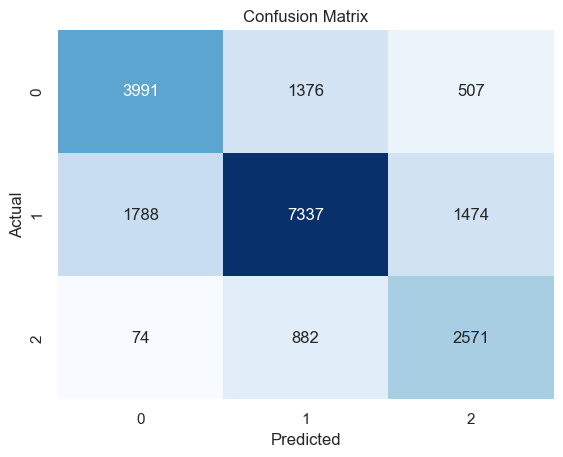

In [48]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## KNN Classifier

In [49]:
# Create KNN Classifier
knn_classifier = KNeighborsClassifier()

# train the model using the training sets
knn_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
knn_predictions = knn_classifier.predict(X_test_scaled)

In [50]:
# evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
conf_matrix = confusion_matrix(y_test, knn_predictions)
classification_rep = classification_report(y_test, knn_predictions)

print(f'Accuracy: {knn_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.79
Confusion Matrix:
[[4790 1041   43]
 [1328 8426  845]
 [  85  927 2515]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      5874
           1       0.81      0.79      0.80     10599
           2       0.74      0.71      0.73      3527

    accuracy                           0.79     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.79      0.79      0.79     20000



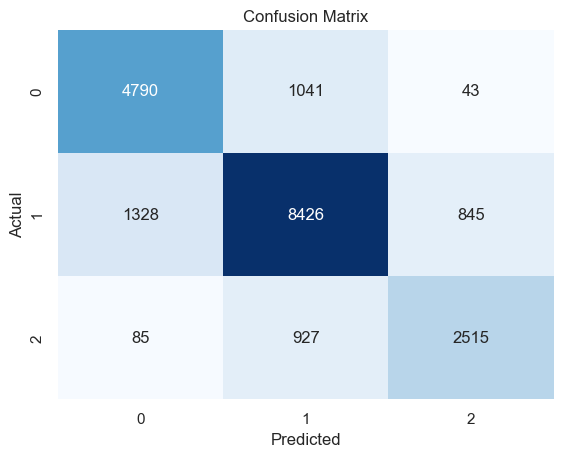

In [51]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree Classifier

In [52]:
# Create decision tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# train the model using the training sets
dt_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
dt_predictions = dt_classifier.predict(X_test_scaled)

In [53]:
# evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
conf_matrix = confusion_matrix(y_test, dt_predictions)
classification_rep = classification_report(y_test, dt_predictions)

print(f'Accuracy: {dt_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.66
Confusion Matrix:
[[4755  501  618]
 [2946 5756 1897]
 [ 253  496 2778]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.81      0.69      5874
           1       0.85      0.54      0.66     10599
           2       0.52      0.79      0.63      3527

    accuracy                           0.66     20000
   macro avg       0.66      0.71      0.66     20000
weighted avg       0.72      0.66      0.66     20000



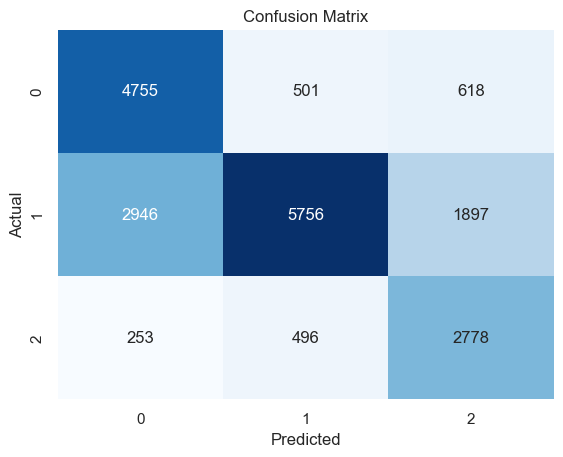

In [54]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest classifier

In [55]:
# Create Random forest Classifier
rf_classifier = RandomForestClassifier()

# train the model using the training sets
rf_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
rf_predictions = rf_classifier.predict(X_test_scaled)

In [56]:
# evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)
classification_rep = classification_report(y_test, rf_predictions)

print(f'Accuracy: {rf_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.81
Confusion Matrix:
[[4905  954   15]
 [1214 8631  754]
 [  13  799 2715]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      5874
           1       0.83      0.81      0.82     10599
           2       0.78      0.77      0.77      3527

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.80     20000
weighted avg       0.81      0.81      0.81     20000



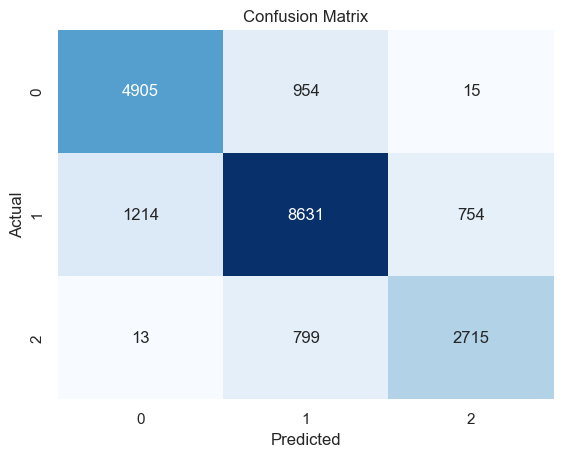

In [57]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression

In [58]:
# Create Logistic regression Classifier
lr_classifier = LogisticRegression(solver='liblinear')

# train the model using the training sets
lr_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
lr_predictions = lr_classifier.predict(X_test_scaled)

In [59]:
# evaluate the model
lr_accuracy = accuracy_score(y_test, lr_predictions)
conf_matrix = confusion_matrix(y_test, lr_predictions)
classification_rep = classification_report(y_test, lr_predictions)

print(f'Accuracy: {lr_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.63
Confusion Matrix:
[[2708 2697  469]
 [1528 7868 1203]
 [  60 1483 1984]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.46      0.53      5874
           1       0.65      0.74      0.69     10599
           2       0.54      0.56      0.55      3527

    accuracy                           0.63     20000
   macro avg       0.61      0.59      0.59     20000
weighted avg       0.63      0.63      0.62     20000



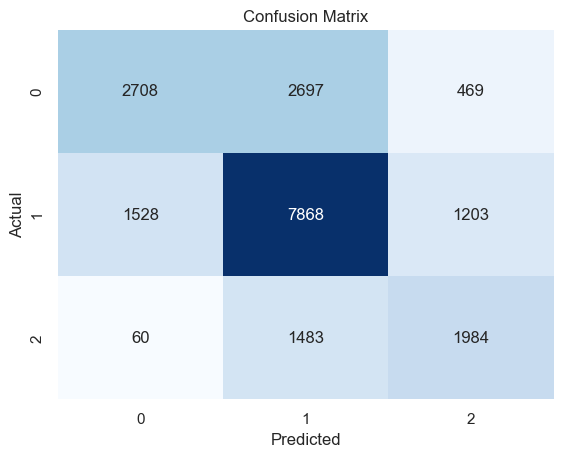

In [60]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [61]:
print(f'SVM_Accuracy: {svc_accuracy:.2f}')
print(f'KNN_Accuracy: {knn_accuracy:.2f}')
print(f'Decision tree_Accuracy: {dt_accuracy:.2f}')
print(f'Random forest_Accuracy: {rf_accuracy:.2f}')
print(f'Logistic regression_Accuracy: {lr_accuracy:.2f}')

SVM_Accuracy: 0.69
KNN_Accuracy: 0.79
Decision tree_Accuracy: 0.66
Random forest_Accuracy: 0.81
Logistic regression_Accuracy: 0.63


The model with best performance is with Random Forest.